In [29]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [30]:
pd.set_option('display.max_columns', None) ## 모든 열 출력
pd.set_option('display.max_rows', None) ## 모든 행 출력

In [31]:
train  = pd.read_csv('./data/train.csv')
test  = pd.read_csv('./data/test.csv')

train = train.drop(['index'],axis = 1)
test =test.drop(['index'],axis = 1)

In [32]:
for name in ['education', 'urban', 'gender', 'engnat', 'hand', 'religion',
            'voted', 'married']:

    mergedata = pd.get_dummies(train[name], prefix = name)
    train = pd.concat([train, mergedata], axis=1)
    train = train.drop([name], axis = 1)

In [33]:
for name in ['education', 'urban', 'gender', 'engnat', 'hand', 'religion',
            'voted', 'married']:

    mergedata = pd.get_dummies(test[name], prefix = name)
    test = pd.concat([test, mergedata], axis=1)
    test = test.drop([name], axis = 1)

### 데이터 살펴보기

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 94 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Q1             14959 non-null  float64
 1   Q2             14931 non-null  float64
 2   Q3             14950 non-null  float64
 3   Q4             14929 non-null  float64
 4   Q5             14962 non-null  float64
 5   Q6             14952 non-null  float64
 6   Q7             14924 non-null  float64
 7   Q8             14952 non-null  float64
 8   Q9             14944 non-null  float64
 9   Q10            14928 non-null  float64
 10  Q11            14941 non-null  float64
 11  Q12            14933 non-null  float64
 12  Q13            14960 non-null  float64
 13  Q14            14964 non-null  float64
 14  Q15            14955 non-null  float64
 15  Q16            14967 non-null  float64
 16  Q17            14963 non-null  float64
 17  Q18            14937 non-null  float64
 18  Q19   

In [35]:
train.country

0        USA
1        USA
2        NLD
3        USA
4        ITA
5        USA
6        USA
7        NLD
8        USA
9        ARE
10       DNK
11       GRC
12       USA
13       USA
14       USA
15       QAT
16       GBR
17       ROU
18       GBR
19       USA
20       USA
21       HUN
22       USA
23       USA
24       AUS
25       USA
26       AUS
27       USA
28       POL
29       USA
30       USA
31       CAN
32       AUS
33       AUS
34       USA
35       ARG
36       USA
37       FRA
38       ITA
39       USA
40       GBR
41       NLD
42       AUS
43       USA
44       USA
45       DEU
46       ITA
47       GBR
48       USA
49       USA
50       USA
51       USA
52       UKR
53       ITA
54       BGR
55       PAK
56       EST
57       USA
58       USA
59       AUS
60       PHL
61       USA
62       USA
63       USA
64       NLD
65       SVN
66       NaN
67       SRB
68       NZL
69       USA
70       DEU
71       USA
72       AUS
73       USA
74       SWE
75       CAN
76       AUS

### 라벨의 수 확인

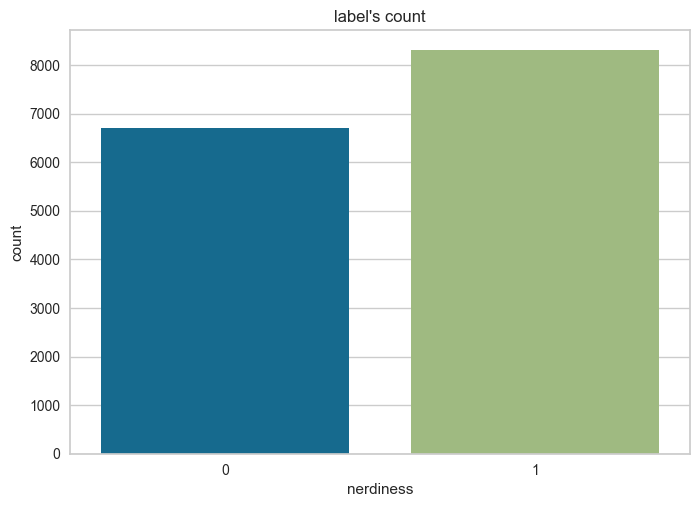

In [36]:
sns.countplot(x='nerdiness',data=train)
plt.title("label's count")
plt.show()

### 결측치 체크

In [37]:
train.isnull().sum()

Q1                41
Q2                69
Q3                50
Q4                71
Q5                38
Q6                48
Q7                76
Q8                48
Q9                56
Q10               72
Q11               59
Q12               67
Q13               40
Q14               36
Q15               45
Q16               33
Q17               37
Q18               63
Q19               53
Q20               45
Q21               39
Q22               38
Q23               50
Q24               61
Q25               44
Q26               68
country          190
introelapse        0
testelapse         0
surveyelapse       0
TIPI1             53
TIPI2             66
TIPI3             79
TIPI4             64
TIPI5             70
TIPI6             62
TIPI7             64
TIPI8             65
TIPI9             64
TIPI10            80
VCL1               0
VCL2               0
VCL3               0
VCL4               0
VCL5               0
VCL6               0
VCL7               0
VCL8         

In [38]:
test.isnull().sum()

Q1               119
Q2               147
Q3               130
Q4               125
Q5                90
Q6               132
Q7               142
Q8               108
Q9               104
Q10              220
Q11              119
Q12              149
Q13               96
Q14              102
Q15              107
Q16               85
Q17               79
Q18              147
Q19               97
Q20              119
Q21              123
Q22               82
Q23              114
Q24              125
Q25              108
Q26              108
country          450
introelapse        0
testelapse         0
surveyelapse       0
TIPI1            107
TIPI2            122
TIPI3            163
TIPI4            138
TIPI5            140
TIPI6            128
TIPI7            134
TIPI8            127
TIPI9            130
TIPI10           176
VCL1               0
VCL2               0
VCL3               0
VCL4               0
VCL5               0
VCL6               0
VCL7               0
VCL8         

#### 결측치 시각화

<AxesSubplot: >

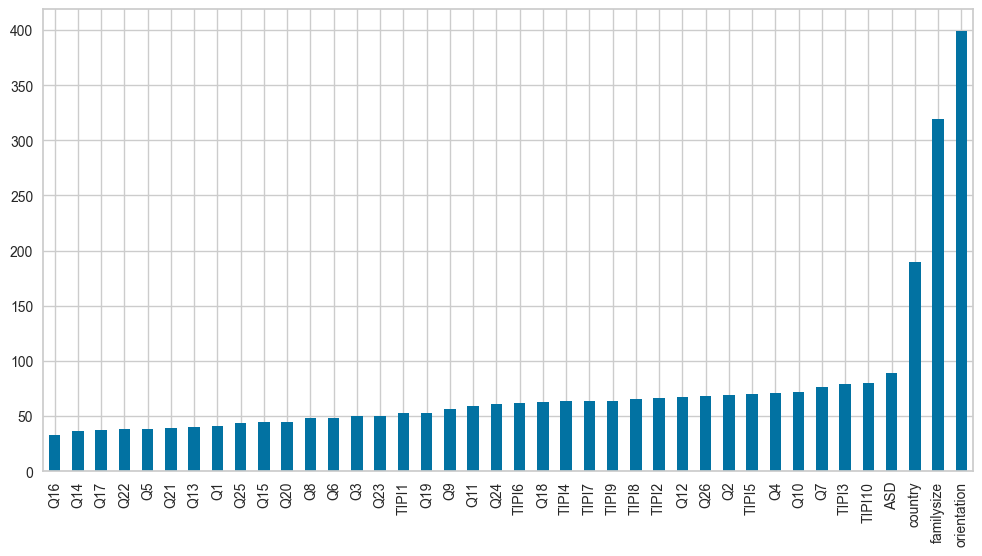

In [39]:
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(figsize = (12,6))

<AxesSubplot: >

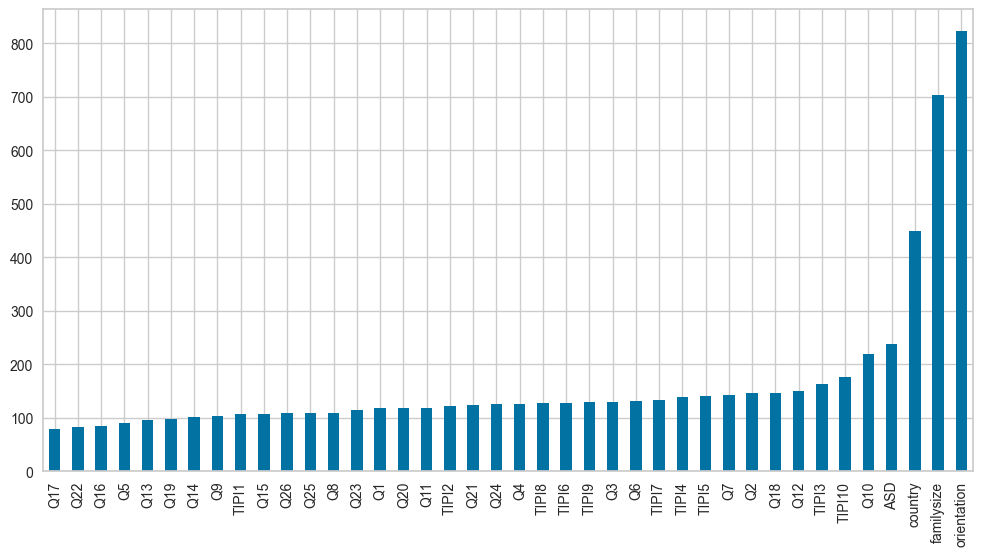

In [40]:
missing_test = test.isnull().sum()
missing_test = missing_test[missing_test > 0]
missing_test.sort_values(inplace=True)
missing_test.plot.bar(figsize = (12,6))

### 결측치 수정

In [41]:
from sklearn.preprocessing import LabelEncoder
ex = LabelEncoder()

In [42]:
train.country = ex.fit_transform(train.country.fillna("X")) #결측치 X로 변경

train.country = ex.fit_transform(train.country.fillna("X")) #결측치 X로 변경

In [43]:
train.country

0        130
1        130
2         94
3        130
4         64
5        130
6        130
7         94
8        130
9          4
10        31
11        47
12       130
13       130
14       130
15       108
16        44
17       109
18        44
19       130
20       130
21        56
22       130
23       130
24         7
25       130
26         7
27       130
28       104
29       130
30       130
31        21
32         7
33         7
34       130
35         5
36       130
37        41
38        64
39       130
40        44
41        94
42         7
43       130
44       130
45        30
46        64
47        44
48       130
49       130
50       130
51       130
52       128
53        64
54        12
55        99
56        37
57       130
58       130
59         7
60       102
61       130
62       130
63       130
64        94
65       119
66       135
67       116
68        97
69       130
70        30
71       130
72         7
73       130
74       120
75        21
76         7

In [44]:
for i in missing.index:
    train[i] = train[i].fillna(6) #0도 선택문항에 존재

for i in missing_test.index:
    train[i] = test[i].fillna(6) #0도 선택문항에 존재

### 결측치 확인

In [45]:
train.isnull().sum()

Q1               0
Q2               0
Q3               0
Q4               0
Q5               0
Q6               0
Q7               0
Q8               0
Q9               0
Q10              0
Q11              0
Q12              0
Q13              0
Q14              0
Q15              0
Q16              0
Q17              0
Q18              0
Q19              0
Q20              0
Q21              0
Q22              0
Q23              0
Q24              0
Q25              0
Q26              0
country          0
introelapse      0
testelapse       0
surveyelapse     0
TIPI1            0
TIPI2            0
TIPI3            0
TIPI4            0
TIPI5            0
TIPI6            0
TIPI7            0
TIPI8            0
TIPI9            0
TIPI10           0
VCL1             0
VCL2             0
VCL3             0
VCL4             0
VCL5             0
VCL6             0
VCL7             0
VCL8             0
VCL9             0
VCL10            0
VCL11            0
VCL12            0
VCL13       

In [46]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35452 entries, 0 to 35451
Data columns (total 93 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Q1             35333 non-null  float64
 1   Q2             35305 non-null  float64
 2   Q3             35322 non-null  float64
 3   Q4             35327 non-null  float64
 4   Q5             35362 non-null  float64
 5   Q6             35320 non-null  float64
 6   Q7             35310 non-null  float64
 7   Q8             35344 non-null  float64
 8   Q9             35348 non-null  float64
 9   Q10            35232 non-null  float64
 10  Q11            35333 non-null  float64
 11  Q12            35303 non-null  float64
 12  Q13            35356 non-null  float64
 13  Q14            35350 non-null  float64
 14  Q15            35345 non-null  float64
 15  Q16            35367 non-null  float64
 16  Q17            35373 non-null  float64
 17  Q18            35305 non-null  float64
 18  Q19   

### one_hot

In [47]:
corr = train.corr()
corr.nerdiness

Q1              -0.000529
Q2              -0.008259
Q3               0.002225
Q4              -0.004121
Q5              -0.025034
Q6              -0.017328
Q7              -0.019228
Q8              -0.010053
Q9              -0.021205
Q10              0.000710
Q11             -0.000746
Q12             -0.014474
Q13             -0.012093
Q14             -0.005543
Q15             -0.003416
Q16              0.000757
Q17              0.004099
Q18             -0.012915
Q19             -0.002513
Q20             -0.017302
Q21             -0.015542
Q22             -0.012872
Q23             -0.020284
Q24             -0.010229
Q25             -0.024589
Q26             -0.018012
introelapse      0.008319
testelapse       0.005550
surveyelapse     0.011953
TIPI1           -0.005648
TIPI2            0.003365
TIPI3           -0.012193
TIPI4            0.005549
TIPI5           -0.015885
TIPI6           -0.005640
TIPI7           -0.003171
TIPI8            0.005113
TIPI9            0.000165
TIPI10      

In [48]:
corr.nerdiness.mean()
corr_top = corr.nerdiness[corr.nerdiness>corr.nerdiness.mean()]
corr_top

VCL1             0.035160
VCL2             0.073068
VCL3             0.108972
VCL4             0.044750
VCL5             0.051207
VCL6             0.033286
VCL7             0.031422
VCL8             0.060814
VCL10            0.026029
VCL11            0.056328
VCL12            0.067186
VCL13            0.109861
VCL14            0.087772
VCL15            0.039101
VCL16            0.023411
nerdiness        1.000000
education_1.0    0.037578
urban_2          0.032902
gender_3.0       0.045199
engnat_1.0       0.056022
hand_3.0         0.017597
religion_2.0     0.056930
religion_9.0     0.023008
married_1.0      0.031486
Name: nerdiness, dtype: float64

In [50]:
from pycaret.classification import *

model = setup(data = train, target = 'nerdiness',use_gpu=True,session_id=2023)

,Description,Value
0,session_id,2023
1,Target,nerdiness
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(15000, 94)"
5,Missing Values,False
6,Numeric Features,76
7,Categorical Features,17
8,Ordinal Features,False
9,High Cardinality Features,False


In [51]:
Top3 = compare_models(sort='Accuracy',n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.5986,0.6079,0.7597,0.6137,0.6788,0.1596,0.1663,1.0210
catboost,CatBoost Classifier,0.5969,0.6133,0.7672,0.6108,0.6800,0.1540,0.1617,4.5280
gbc,Gradient Boosting Classifier,0.5963,0.6124,0.7981,0.6051,0.6882,0.1455,0.1573,3.7330
et,Extra Trees Classifier,0.5893,0.5982,0.7665,0.6043,0.6757,0.1366,0.1441,0.8920
ada,Ada Boost Classifier,0.5891,0.6018,0.7479,0.6073,0.6702,0.1405,0.1462,0.9180
rf,Random Forest Classifier,0.5853,0.5972,0.7841,0.5982,0.6786,0.1231,0.1324,0.7340
xgboost,Extreme Gradient Boosting,0.5822,0.5909,0.6927,0.6112,0.6493,0.1377,0.1394,0.6060
ridge,Ridge Classifier,0.5790,0.0000,0.7737,0.5948,0.6724,0.1109,0.1185,0.0400
lda,Linear Discriminant Analysis,0.5790,0.5814,0.7721,0.5950,0.6720,0.1112,0.1186,0.3030
knn,K Neighbors Classifier,0.5642,0.5728,0.6471,0.6022,0.6238,0.1076,0.1080,1.6070


In [52]:
tuned_top3 = [tune_model(i) for i in Top3]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6314,0.6387,0.7547,0.6458,0.6960,0.2352,0.2398
1,0.5829,0.6090,0.7376,0.6039,0.6641,0.1281,0.1326
2,0.5924,0.6193,0.7291,0.6141,0.6667,0.1520,0.1557
3,0.5895,0.5991,0.7389,0.6090,0.6677,0.1438,0.1485
4,0.5905,0.6207,0.7713,0.6043,0.6777,0.1384,0.1464
5,0.5714,0.5841,0.7338,0.5939,0.6565,0.1034,0.1075
6,0.5848,0.5943,0.7116,0.6096,0.6567,0.1392,0.1419
7,0.5924,0.6034,0.7526,0.6091,0.6733,0.1472,0.1531
8,0.6086,0.6295,0.7355,0.6274,0.6771,0.1880,0.1919


In [53]:
blended = blend_models(estimator_list=tuned_top3,fold=5,method='soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6171,0.6438,0.8022,0.6219,0.7007,0.1926,0.2049
1,0.5910,0.6128,0.7724,0.6048,0.6784,0.1389,0.1469
2,0.6024,0.6249,0.8039,0.6092,0.6931,0.1580,0.1707
3,0.5967,0.6006,0.7790,0.6083,0.6831,0.1510,0.1599
4,0.5950,0.6165,0.7671,0.6091,0.6790,0.1498,0.1572
Mean,0.6004,0.6197,0.7849,0.6107,0.6869,0.1580,0.1679
Std,0.0091,0.0144,0.0153,0.0059,0.0087,0.0183,0.0200


In [54]:
pred_holdout= predict_model(blended)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.5972,0.6220,0.7988,0.5958,0.6825,0.1624,0.1759


In [55]:
final_model = finalize_model(blended)

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 

In [56]:
predictions = predict_model(final_model, data = test)

In [57]:
predictions['Score']

0        0.5699
1        0.6714
2        0.6300
3        0.6697
4        0.5606
          ...  
35447    0.6049
35448    0.5076
35449    0.6334
35450    0.5388
35451    0.5585
Name: Score, Length: 35452, dtype: float64

In [58]:
predictions['Label']

0        1
1        1
2        1
3        1
4        0
        ..
35447    0
35448    0
35449    1
35450    1
35451    0
Name: Label, Length: 35452, dtype: int32

In [ ]:
predictions.loc[predictions['Label'] == 0, 'Score'] = 1 - predictions.loc[predictions['Label'] == 0, 'Score']

In [60]:
predictions['Score']

0        0.5699
1        0.6714
2        0.6300
3        0.6697
4        0.4394
          ...  
35447    0.3951
35448    0.4924
35449    0.6334
35450    0.5388
35451    0.4415
Name: Score, Length: 35452, dtype: float64

In [61]:
sub = predictions['Score']

In [62]:
sub

0        0.5699
1        0.6714
2        0.6300
3        0.6697
4        0.4394
          ...  
35447    0.3951
35448    0.4924
35449    0.6334
35450    0.5388
35451    0.4415
Name: Score, Length: 35452, dtype: float64

In [63]:
submission = pd.read_csv('./data/sample_submission.csv')

submission['nerdiness'] = sub

In [64]:
submission

,index,nerdiness
0,0,0.5699
1,1,0.6714
2,2,0.6300
3,3,0.6697
4,4,0.4394
...,...,...
35447,35447,0.3951
35448,35448,0.4924
35449,35449,0.6334
35450,35450,0.5388


In [65]:
submission.to_csv("./submit/submit3.csv", index = False)